# Collaborative Filtering for Implicit Feedback Datasets

## Content 

###  What is collaborative filtering? 

### Benefits of collaborative filtering

### Limitations of collaborative filtering

### Type of data

### The big picture

### So what do we need to do? 

### How do we uncover the hidden dimensions of tastes? 

### Model

   - Notations
   
   - The notion of confidence
   
   - What is the goal of the model? 
   
   - Key points to remember while defining the cost function. 
   
   - Minimization of the cost function.
   
   
### Code demonstration


### What is collaborative filtering? 

* It is a technique of learning about the preferences of individual users by using information from many users (collaboration).


* The idea is that if a person A has similar tastes as person B on a product, A is more likely to have the same tastes as B on a different product than a completely random person.


### Benefits of collaborative filtering

* The only data that it needs is the past behaviour of the users, like what products they have purchased in the past, what ratings they have given to the movies? 


* Because it does not depend on any kind of metadata about the users or the products it is domain free and can be applied to any domain. 

### Limitations of collaborative filtering

* It suffers from the cold start problem. 


* That is, it cannot address products which are new to the system. 


* For new users, the problem is not as severe, as some content based techniques can be leveraged to make informed recommendations in most cases.   

### Type of data 

* ### **Explicit data**  

   -    In the case of explicit data, the positive as well as the negative preferences of the users are known, for example the ratings on a scale of 1-5 in the case of movies. 
   
   <br>
   
   -  However, users do not often provide their ratings on products and also do not update their ratings. Also many times, a system might not have the functionality that allows users to provide their ratings. 
   
* ### **Implicit data**

   - In most cases the quantity of implicit data is much more than the explicit data, more data is better for collaborative     filtering algorithms. 
   
   <br>
   
   - Implicit data is much easier to collect. 
   
   <br>
   
   - One challenge to modeling with implicit data is that it lacks any signals for negative preferences. 


### The big picture

It is easier to count how many times users have used each products and then collect these counts in a user by item matrix.

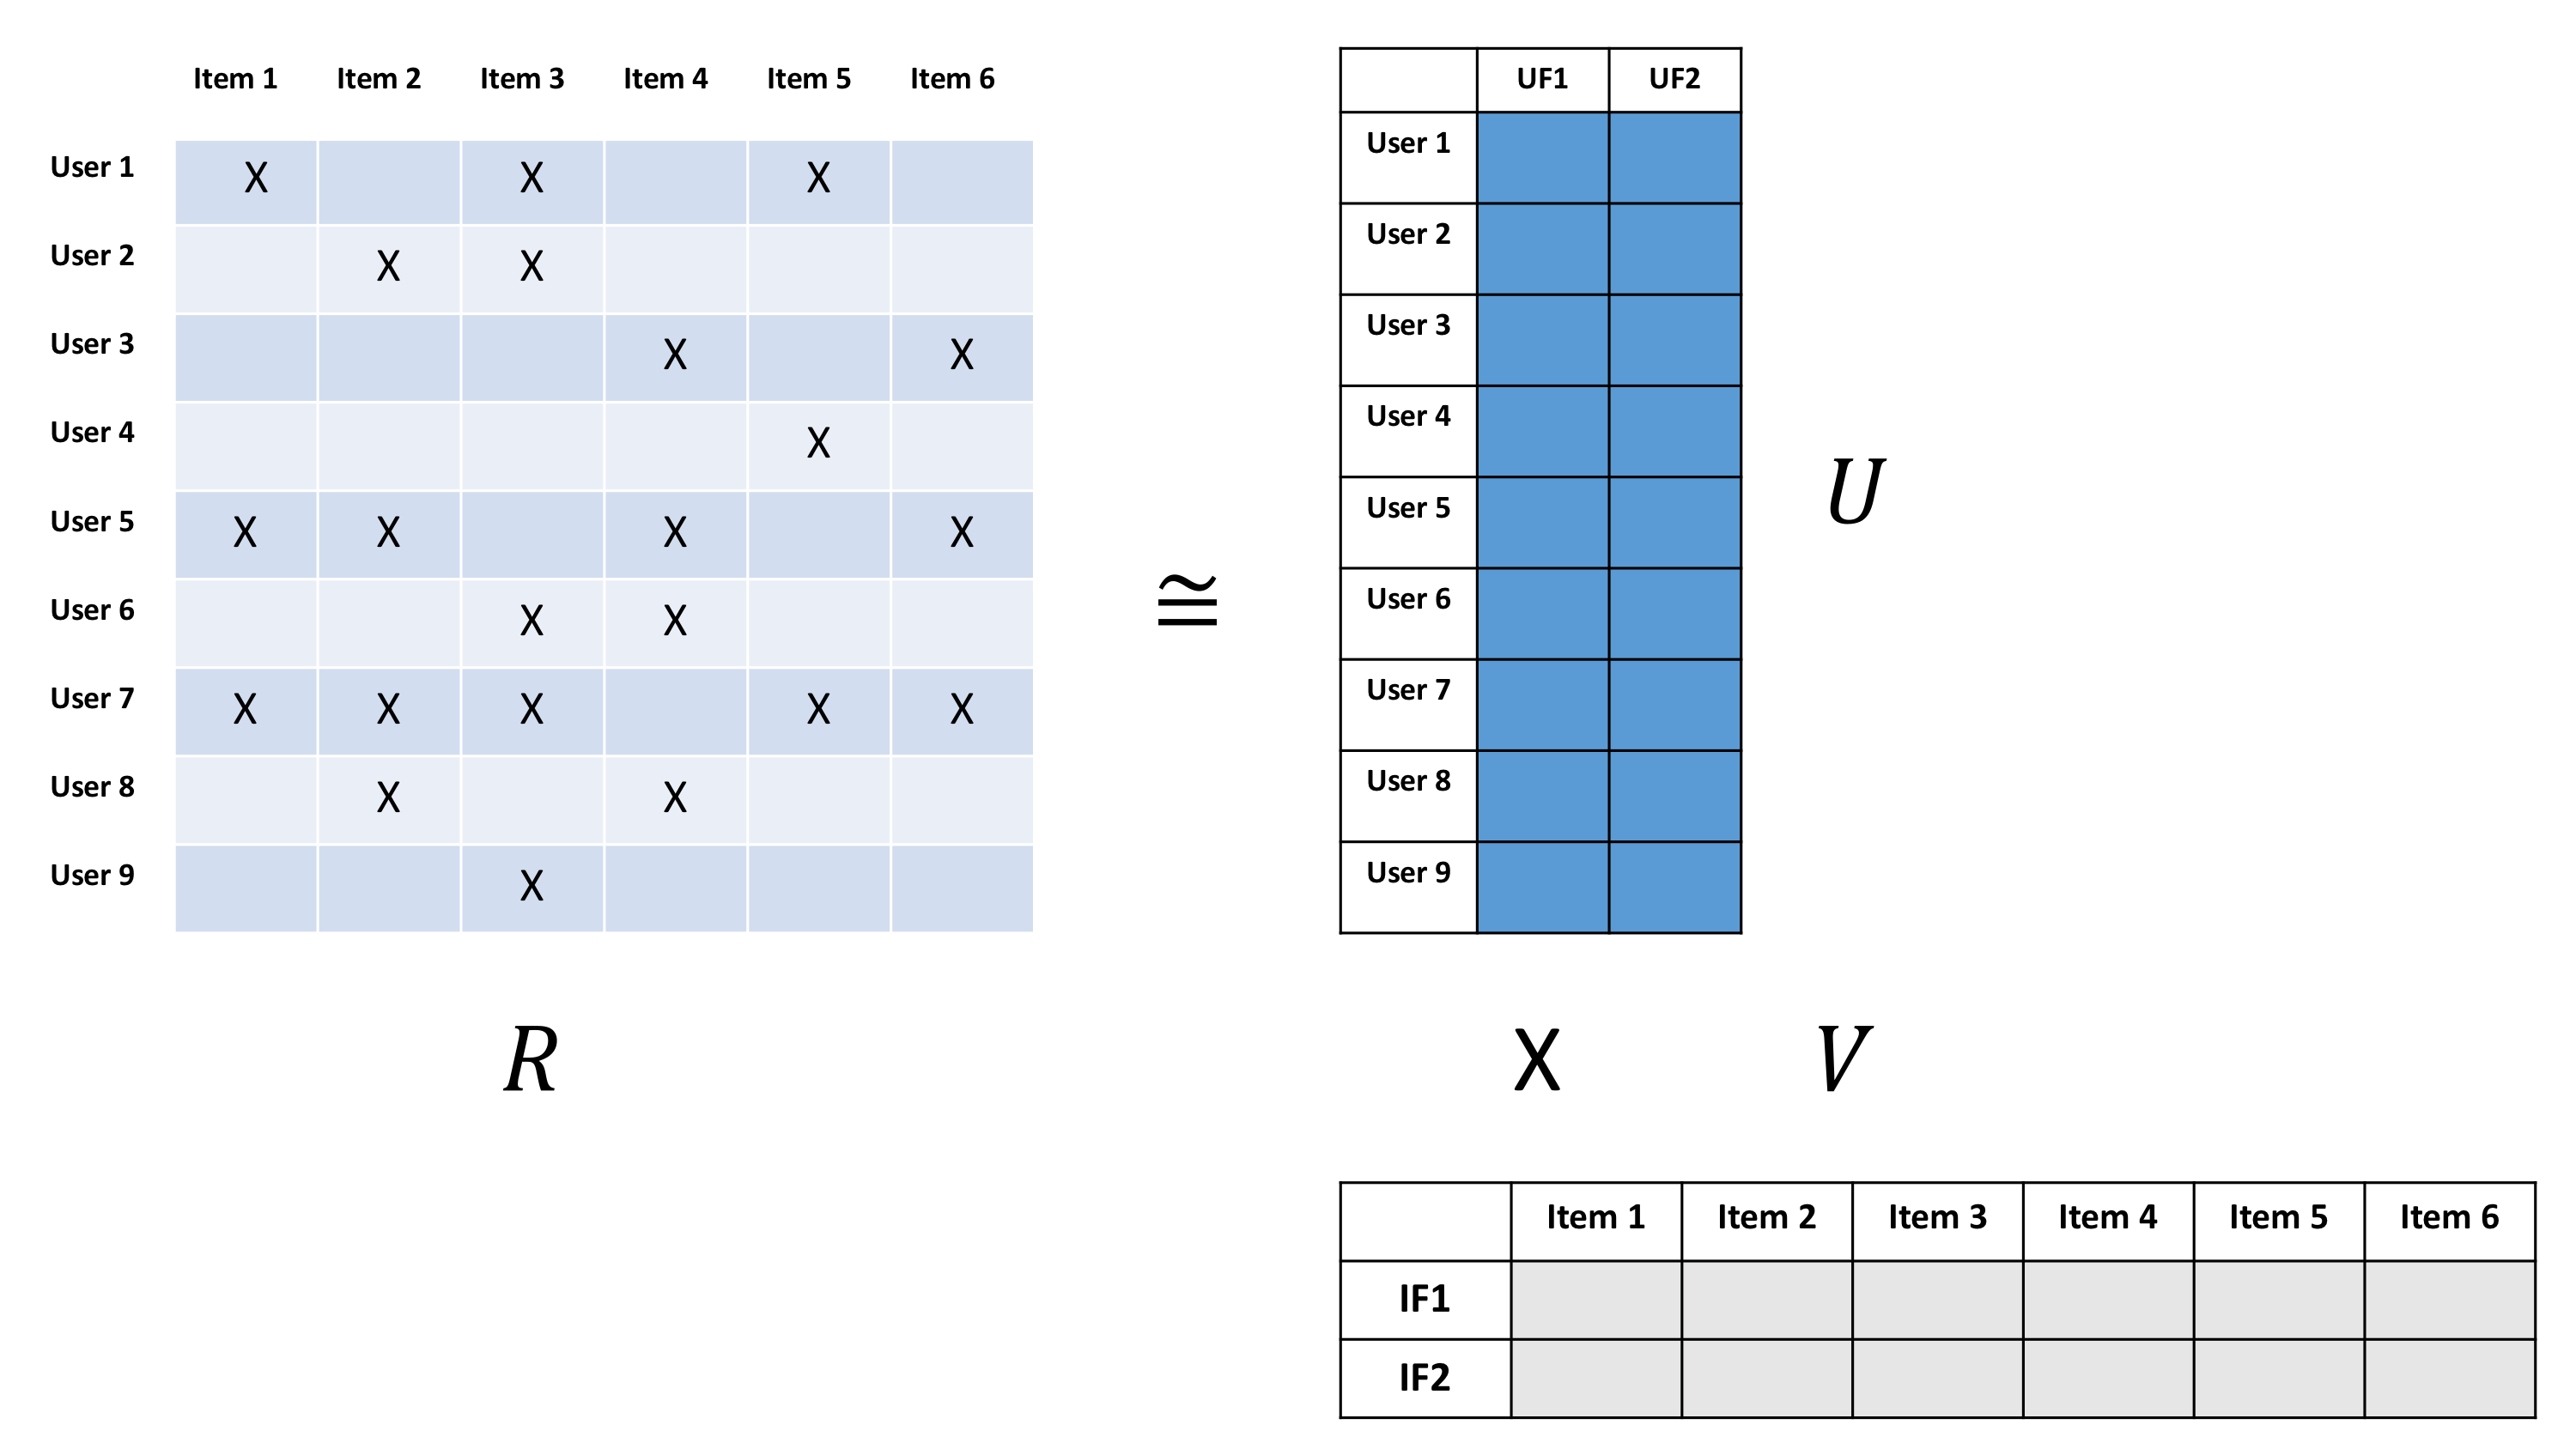

In [60]:
from IPython.display import Image
Image(filename='/home/lcstudent2/Desktop/Rec_system_project/ALS_Image_Test.png')

* In most cases the user item matrix (**R**) is very huge. This is highly overspecialized and overfit representation of the user tastes. 


* In reality users are not that complex and their preferences can be explained by few inherent dimensions of taste. 


* A good analogy is the case of movies, we can easily calculate the preference of a user for a particular movie if we somehow knew the magnitude of the various genres in the movie and the liking of the user for each of those genres.  

### So what do we need to do? 

* From the user item matrix, observe that in order to make recommendations for new products we would have to fill the elements of the matrix which are empty. 


* This process of completing the matrix is done by uncovering hidden dimensions of taste, these dimensions are usually not interpretable. 


* These latent dimensions can be uncovered by factorizing the user item matrix into two low rank matrices, called the user matrix and the item matrix.


* The user matrix has the weights of each user on the hidden dimensions of taste. 


* The item matrix has the weights of each item on the hidden dimensions of taste. 


* Now the original matrix can be recovered by a matrix multiplication of these two matrices and in this process we will also fill the elements of the user item matrix which were empty. 


* This will allow us to make recommendations of new products to the users by simply finding the products for which the particular user has a high score after the matrix completion step. 


* This leads to very precise personalized recommendations, it is well known that personalization is key for a successful recommendation system. 

### How do we unconver the hidden dimensions of taste? 



We can use a technique known as matrix factorization to find these hidden dimensions of taste. The model that is used for factorizing the matrix is known as latent factor models. These models try to find dimensions such that they can best explain the counts in the user item matrix. 

### Model

#### Notations

* We denote the users with indexes `u` and `v`. 


* Items are denoted with indexes `i` and `j`.


* We assume there are `m` number of users and `n` number of items. 


* $r_{ui}$ denotes the count of how many times user `u` has used the item `i`. 


* If the user `u` has not used the item `i` then $r_{ui}$ is 0. 


* $p_{ui}$ is equal to 1 if $r_{ui} \ > 0$  and 0  if $r_{ui} \ = 0$


* `f` is the number of dimensions of taste that we would like to uncover, this is also a hyper parameter and data-dependent.  

#### The notion of confidence

* Our confidence in $p_{ui}$ being equal to 1 is associated with varying confidence levels. 


* That is as $r_{ui}$ increases we become more confident that $p_{ui}$ is equal to 1, or in layman terms the more a user has used a particular item the more confident we are that she indeed likes the item. 


* We define another term, $c_{ui}$ which denotes the confidence we have that the user `u` likes the item `i`, or meaning the confidence we have in observing $p_{ui} = 1$. 


* A good choice for $c_{ui}$ is $c_{ui} = 1 + \alpha r_{ui}$, where $\alpha$ is a hyper parameter that depends on the data and can be determined by cross validation. 


* The above setting puts a minimal confidence of $c_{ui} = 1$ when $r_{ui} = 0$ 

    <br>
    * Instead of saying we are not confident at all that the user likes an item when she has not used it, it makes better sense to say that we have a minimal confidence that the user likes it. This is because if the user has not used an item, there are two possibilities, that either she does not like the item or she has not yet come across the item.
    
    <br>
    
    * Ideally we would like to recommend items that the user has not previously used, defining the confidence as above involves these unused items by the users in the algorithm. This makes sense because our recommendations for a particular user would be coming from the pool of unused items by that user.
    
    <br>
   
    * This setting also helps us against overfitting which would be highly likely if we were to only use the items that have been used by the users as input data to the algorithm. That would be a gross misrepresentation of the user profiles as we are only providing the algorithm the positive preferences and not giving it any chance to learn about the negative preferences of the users which is also important if we were to make personalized recommendations. 



#### What is the goal of the model? 


The goal can be summarised as follows : 

* For each user `u` find a vector $x_u \in R^{f}$ which gives the likingness weights of the user `u` on the `f` dimensions of taste. 


* For each item `i` find a vector $y_i \in R^{f}$ which gives the weights of the item `i` on the `f` dimensions of taste.


* The preference $p_{ui}$ can then be calculated as an inner product of the user vectors and the item vectors, that is $p_{ui} = x_{u}^{T}y_{i}$

    * What we are trying to do here is map the users and the items to a common latent factor space where they can be directly compared. 




#### Key points to remember while defining the cost function


Like most machine learning algorithms, the latent factor models also have an associated cost function which is minimized in order to find the user and the item vectors. 

The key points to remember while defining the cost function are as follows: 

* We have to account for the varying confidence levels. 

* The optimization should account for all possible `u`, `i` pairs and not just those corresponding to observed data. 

#### Cost Function

* The user and item vectors are computed by minimizing the following cost function :

    C =  $\displaystyle\sum_{u,i}^{} c_{ui}(p_{ui} - x_{u}^{T}y_{i})^2$ + $\lambda (\displaystyle\sum_{u} \lVert x_u \rVert ^2 + \displaystyle\sum_{i} \lVert y_i \rVert ^2)$

* The minimization of the above cost function leads to the discovery of user and item vectors such that the difference between their dot product and the preference $p_{ui}$ is minimum, by using $c_{ui}$ as the weights, we are forcing the cost function to put more emphasis on the `u`, `i` pairs for which $c_{ui}$ or $r_{ui}$ is high.  


* This means that eventually we will get such user and item vectors, the inner product of which would be very close to `1` for the `u`, `i` pairs which have a high confidence $c_{ui}$. 


* The above logic is very similar to the logic of fitting the training set properly, the generalization ability of the algorithm is attained by using the term $\lambda (\displaystyle\sum_{u} \lVert x_u \rVert ^2 + \displaystyle\sum_{i} \lVert y_i \rVert ^2)$ in the cost function which makes sure that the user and the item vectors don't blow out of proportion. (that is we are penalizing the L2 norm of the user and the item vectors). 



* Here $\lambda$ is the regularization parameter.  

#### Minimization of the cost function 

* The cost function is not a convex function as it involves both the quadratic powers of both $x_u$ and $y_i$ which we are tring to solve for.


* However if we fix either the user factor or the item factor then the cost function becomes quadratic and thus an exact solution is possible to obtain.


* This leads to an alternative least squares optimization process, where we can alternatively re-compute user factors and item factors.


* Since we can find the exact solution of the user and the item factors by fixing the other, each iteration of the alternating least square strategy is guaranteed to minimize the cost function. 

* Solving for $x_u$ by keeping $y_i$ as constant we get : 

    $ x_u = (Y^TC^uY + \lambda I)^{-1} Y^TC^up(u)$ 
    
    where Y is a `n` $\times$ `f` dimension matrix, that is the rows of the matrix are $y_{1}^T$, $y_{2}^T$, ... , $y_{n}^T$,  
    
    $C^u$ is a `n` $\times$ `n` dimension diagnoal matrix with $C_{ii}^u = c_{ui}$
    
    $I$ is a `f` $\times$ `f` identity matrix 
    
    $p(u) \in R^{n}$ which contains all the preferences for user u, that is the $p_{ui}$ values.  
    

<br>

* Solving for $y_i$ by keeping $x_u$ as constant we get : 

    $ y_i = (X^TC^iX + \lambda I)^{-1} X^TC^ip(i)$ 
    
    where X is a `m` $\times$ `f` dimension matrix, that is the rows of the matrix are $x_{1}^T$, $x_{2}^T$, ... , $x_{m}^T$,  
    
    $C^i$ is a `m` $\times$ `m` dimension diagnoal matrix with $C_{uu}^i = c_{ui}$
    
    $I$ is a `f` $\times$ `f` identity matrix 
    
    $p(i) \in R^{m}$ which contains all the preferences for item i, that is the $p_{ui}$ values. 

Speedup of the code can be achieved by employing some algebraic tricks: 

* $Y^TC^uY$ can be written as $Y^T Y + Y^T (C^u - I)Y$. 


* This allows us to precompute the $Y^T Y$ term beforehand,

  for the $Y^T (C^u - I)Y$ term, the term $(C^u - I)$ has only $n_u$ non zero terms, where $n_u$ is the number of items for which $r_{ui}$ > 0 and usually $n_u << n$ 
  
  
  
* Similarly, $X^TC^iX$ can be written as $X^T X + X^T (C^i - I)X$.

Using the above solution and speedup tricks, we alternate between computing the user factors and the item vectors. Typical number of times for which this should be repeated is 10. 

Then we can obtain predicted preferences for all `u`,`i` pairs using   $\hat{p_{ui}} = x_{u}^{T} y_{i}$

To recommend items `i` to the user `u`, we find the items that have not been used by the user u, sorted by predicted preference $\hat{p_{ui}}$ 

A good thing about the alternating least squares algorithm is that it is highly parallelizable, that is the calculation of user factors (and item factors) can be done in parallel as the user factor (and item factors) for the different users (and items) are independent of each other as is evident from the analytical solutions of for $x_{u}$ (and $y_{i}$) above. 

## Code Demonstration

In [61]:
# let's first load some libraries
import pandas as pd
import scipy.sparse as sparse
import numpy as np
from scipy.sparse.linalg import spsolve
import warnings
warnings.filterwarnings("ignore")

# this is the linear equations solver
# instead of taking matrix inverse, it is easier to solve system of equations
from scipy.sparse.linalg.dsolve import linsolve

In [62]:
# need these packages for parallel computing
from joblib import Parallel, delayed
import multiprocessing

In [63]:
# the data that we will be using

website_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'
retail_data = pd.read_excel(website_url) # This may take a couple minutes

In [64]:
# how does the data looks like?
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [65]:
# let's add the month and year to the dataframe
retail_data['mnth_yr'] = retail_data['InvoiceDate'].apply(lambda x: x.strftime('%b-%Y'))    

In [66]:
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,mnth_yr
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,Dec-2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Dec-2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,Dec-2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Dec-2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Dec-2010


In [67]:
# are there any missing?
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541909 entries, 0 to 541908
Data columns (total 9 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
mnth_yr        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 41.3+ MB


In [68]:
# there is some missing in the CustomerID column
# we should remove those
cleaned_retail = retail_data.loc[pd.isnull(retail_data.CustomerID) == False]

In [69]:
# here we are basically creating a dataframe of stockcodes and their corresponding descriptions
item_lookup = cleaned_retail[['StockCode', 'Description']].drop_duplicates() # Only get unique item/description pairs
item_lookup['StockCode'] = item_lookup.StockCode.astype(str) # Encode as strings for future lookup ease

In [70]:
item_lookup.head()

,StockCode,Description
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER
1,71053,WHITE METAL LANTERN
2,84406B,CREAM CUPID HEARTS COAT HANGER
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE
4,84029E,RED WOOLLY HOTTIE WHITE HEART.


In [71]:
# StockCodes which have only alphabets
alpha_codes = [i for i in item_lookup.StockCode if i.isalpha() == True]

In [72]:
# get the description of these codes

item_lookup[item_lookup.StockCode.isin(alpha_codes)]

,StockCode,Description
45,POST,POSTAGE
141,D,Discount
2239,M,Manual
157195,PADS,PADS TO MATCH ALL CUSHIONS
317507,DOT,DOTCOM POSTAGE
317508,CRUK,CRUK Commission


In [73]:
# remove the rows belonging to these codes from the data
cleaned_retail = cleaned_retail[~cleaned_retail.StockCode.isin(alpha_codes)]
# Now we would want to group by CustomerID and StockCode and sum up the quantity for the StockCode
cleaned_retail['CustomerID'] = cleaned_retail.CustomerID.astype(int) # Convert to int for customer ID
cleaned_retail = cleaned_retail[['StockCode', 'Quantity', 'CustomerID','mnth_yr']]

Ideally we should try to make our train and test set similar to each other, so a good strategy would be to sample the training set and test set from each of the months.

In [74]:
train_set =  cleaned_retail[cleaned_retail.mnth_yr != "Dec-2011"]
train_set_grouped = train_set.groupby(['CustomerID', 'StockCode']).sum().reset_index() # Group together

In [75]:
# after doing this step sometimes the Quantity can be zero
# which means the Customer returned that particular Product
train_set_grouped.head()

,CustomerID,StockCode,Quantity
0,12346,23166,0
1,12347,16008,24
2,12347,17021,36
3,12347,20665,6
4,12347,20719,30


In [76]:
# this is how it would look in the original data
cleaned_retail[cleaned_retail.CustomerID == 12346]

,StockCode,Quantity,CustomerID,mnth_yr
61619,23166,74215,12346,Jan-2011
61624,23166,-74215,12346,Jan-2011


In [77]:
# Replace a sum of zero purchases with a one, which means they atleast brought it
# even if they returned it, we are changing the quantity to only one, which would not mean that high confidence
train_set_grouped.Quantity.loc[train_set_grouped.Quantity == 0] = 1 


In [78]:
train_set_grouped.head()

,CustomerID,StockCode,Quantity
0,12346,23166,1
1,12347,16008,24
2,12347,17021,36
3,12347,20665,6
4,12347,20719,30


In [79]:
# make a test set
test_set = cleaned_retail[cleaned_retail.mnth_yr == "Dec-2011"]
test_set_grouped = test_set.groupby(['CustomerID', 'StockCode']).sum().reset_index() # Group together

In [80]:
# Replace a sum of zero purchases with a one, which means they atleast brought it
# even if they returned it, we are changing the quantity to only one, which would not mean that high confidence
test_set_grouped.Quantity.loc[test_set_grouped.Quantity == 0] = 1 


In [81]:
test_set_grouped.head()

,CustomerID,StockCode,Quantity
0,12347,20719,10
1,12347,21064,24
2,12347,21265,12
3,12347,21731,24
4,12347,23084,24


In [82]:
# from this test set we should only keep those users and products which are there in the train set

test_set_grouped = test_set_grouped[test_set_grouped.CustomerID.isin(set(train_set.CustomerID)) & 
                                   test_set_grouped.StockCode.isin(set(train_set.StockCode))]

In [83]:
test_set_grouped.head()

,CustomerID,StockCode,Quantity
0,12347,20719,10
1,12347,21064,24
2,12347,21265,12
3,12347,21731,24
4,12347,23084,24


In [84]:
ck = train_set_grouped.pivot(index='CustomerID', columns='StockCode', values='Quantity').fillna(0)

In [85]:
ck

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214L,90214M,90214N,90214P,90214R,90214S,90214V,90214Y,BANK CHARGES,C2
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12352,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12353,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12354,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12355,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
# we should remove these columns as well
item_lookup[item_lookup.StockCode.isin(["BANK CHARGES","C2"])]

,StockCode,Description
1423,C2,CARRIAGE
4406,BANK CHARGES,Bank Charges


In [87]:
ck = ck.drop(["BANK CHARGES","C2"],1)

In [88]:
ck

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214J,90214K,90214L,90214M,90214N,90214P,90214R,90214S,90214V,90214Y
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12352,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12353,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12354,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12355,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
# should also remove the rows corresponding to these codes from the test set

test_set_grouped = test_set_grouped[~test_set_grouped.StockCode.isin(["BANK CHARGES","C2"])]

* For each user, we should only keep the items that are not there in the train set, because if there is an item in the train set, then it becomes easier to predict that the user will use it and if it is in the test set as well, we might not get a true picture of the error that we have in the system. 

* Also, since we have to recommend new products, having items in the test set which the algorithm has not seen for that particular user enables us to find best set of hyper parameters.

In [90]:
outer = pd.merge(train_set_grouped,test_set_grouped, how='outer', indicator=True,
         left_on = ["CustomerID", "StockCode"], right_on = ["CustomerID", "StockCode"])

In [91]:
outer.head()

,CustomerID,StockCode,Quantity_x,Quantity_y,_merge
0,12346,23166,1,NaN,left_only
1,12347,16008,24,NaN,left_only
2,12347,17021,36,NaN,left_only
3,12347,20665,6,NaN,left_only
4,12347,20719,30,10,both


In [92]:
test_set_grouped = outer[outer._merge == "right_only"].drop(["Quantity_x","_merge"],1)

In [93]:
test_set_grouped.columns = ["CustomerID","StockCode","Quantity"]

In [94]:
# function for user factors
def user_vectors(u):
    
    # Grab user row from confidence matrix and convert to dense
    conf_samp = conf[u,:].toarray() 
    
    # Create binarized preference vector 
    pref = conf_samp.copy() 
    pref[pref != 0] = 1
    
    # Get Cu - I term, don't need to subtract 1 since we never added it
    CuI = sparse.diags(conf_samp, [0])
    
    # This is the yT(Cu-I)Y term
    yTCuIY = Y.T.dot(CuI).dot(Y)
        
    # This is the yTCuPu term, where we add the eye back in    
    yTCupu = Y.T.dot(CuI + Y_eye).dot(pref.T)
    
    # here we are actually solving the system of linear equations rather than inverting the matrix
    res = spsolve(yTy + yTCuIY + lambda_eye, yTCupu)
    return res

In [95]:
#function for item factors
def item_vectors(v):
    conf_samp = conf[:,v].T.toarray()
    pref = conf_samp.copy()
    pref[pref != 0] = 1 # Create binarized preference vector
    CiI = sparse.diags(conf_samp, [0]) # Get Ci - I term, don't need to subtract 1 since we never added it
    xTCiIX = X.T.dot(CiI).dot(X) # This is the xT(Cu-I)X term
    xTCiPi = X.T.dot(CiI + X_eye).dot(pref.T) # This is the xTCiPi term
    res1= spsolve(xTx + xTCiIX + lambda_eye, xTCiPi)
    return res1

In [96]:
# enables the parallel code to use as many cores as there are available
num_cores = -1

In [97]:
# max quantity in training
np.max(train_set_grouped.Quantity)

12540

In [98]:
# max quantity in test
np.max(test_set_grouped.Quantity)

601.0

In [99]:
# 99 percentile in training
train_set_grouped.Quantity.quantile(0.99)

192.0

In [100]:
# 99 percentile in test
test_set_grouped.Quantity.quantile(0.99)

72.0

In [101]:
# we can cap the quantity column at 99 percentile
train_set_capped = train_set_grouped[train_set_grouped.Quantity <= train_set_grouped.Quantity.quantile(0.99)]
test_set_capped = test_set_grouped[test_set_grouped.Quantity <= test_set_grouped.Quantity.quantile(0.99)]

In [102]:
ck = train_set_capped.pivot(index='CustomerID', columns='StockCode', values='Quantity').fillna(0)

In [103]:
ck = ck.drop(["BANK CHARGES","C2"],1)

In [104]:
# it's possible that sometimes when you run this you get a joblib error saying
# that you need to protect the main loop before doing parallel computing
# haven't been able to troubleshoot that. Restart your kernel and run the entire notebook again if you encounter that 
# error 



alpha_g = [3]
rank_size_g =[140]
lambda_val_g = [260]


iterations = 10

for alpha in alpha_g:
    
    for rank_size in rank_size_g:
        
        for lambda_val in lambda_val_g:
            
            conf = sparse.csr_matrix(alpha*ck)

            num_user = conf.shape[0]
            num_item = conf.shape[1] 
    
            rstate = np.random.RandomState(0)
    
            X = sparse.csr_matrix(rstate.normal(size = (num_user, rank_size))) 
            Y = sparse.csr_matrix(rstate.normal(size = (num_item, rank_size))) 
            X_eye = sparse.eye(num_user)
            Y_eye = sparse.eye(num_item)
                    
            lambda_eye = lambda_val * sparse.eye(rank_size) # Our regularization term lambda*I. 
   
            for iter_step in range(iterations): # Iterate back and forth between solving X given fixed Y and vice versa
                        # Compute yTy and xTx at beginning of each iteration to save computing time
                print("iteration number:",str(iter_step))
                yTy = Y.T.dot(Y)
                xTx = X.T.dot(X)
                        # Being iteration to solve for X based on fixed Y
                
                
                X = sparse.csr_matrix(Parallel(n_jobs=num_cores, max_nbytes=1e10 )
                                              (delayed(user_vectors)(u) for u in range(num_user)))
                
                Y = sparse.csr_matrix(Parallel(n_jobs=num_cores ,max_nbytes=1e10)
                                              (delayed(item_vectors)(v) for v in range(num_item)))   

####     uncomment the following block if you want to do a grid search by defining multiple hyper parameters #######
                
#             prefs = np.dot(X, Y.T)
#             prefs = pd.DataFrame(prefs.toarray()).set_index(ck.index)
#             prefs.columns = ck.columns
#             prefs = pd.DataFrame(prefs.stack("StockCode"))
#             prefs.columns = ["pref_value"]
#             prefs = prefs.reset_index() 
#             prefs_main = prefs.groupby('CustomerID'). \
#                          apply(pd.DataFrame.sort_values, 'pref_value', ascending = False). \
#                          drop("CustomerID",1).reset_index().drop("level_1",1)
                        
#             exp_perct = (1- prefs_main.groupby("CustomerID").pref_value.rank(pct = True))*100
#             prefs_main.loc[:,"exp_perct"] = exp_perct
#             prefs_main["StockCode"] = prefs_main["StockCode"].astype(str)
                
#             test_set_from_test = test_set_grouped.copy()
#             test_set_from_test["StockCode"] = test_set_from_test["StockCode"].apply(str)
#             holdit = pd.merge(prefs_main, test_set_from_test, 
#                   left_on = ["CustomerID", "StockCode"], right_on = ["CustomerID", "StockCode"])
                
#             epr = np.sum(holdit["Quantity"]*holdit["exp_perct"]) / (np.sum(holdit["Quantity"]))
                
#             storage = {"alpha" : alpha, "latent fact": rank_size, "regularization" : lambda_val, \
#                           "exp perct rank": epr}
                
#             print(storage)

                        
                


('iteration number:', '0')
('iteration number:', '1')
('iteration number:', '2')
('iteration number:', '3')
('iteration number:', '4')
('iteration number:', '5')
('iteration number:', '6')
('iteration number:', '7')
('iteration number:', '8')
('iteration number:', '9')


In [105]:
# this would be our predicted preference matrix
prefs = np.dot(X, Y.T)

# the matrix would be sparse, so convert it to dense and set index as the CustomerID
prefs = pd.DataFrame(prefs.toarray()).set_index(ck.index)

# set columns as the StockCode
prefs.columns = ck.columns

# bring all the StockCode and corresponding StockCodes to a column
prefs = pd.DataFrame(prefs.stack("StockCode"))

# the predicted preferences are renamed as pref_value
prefs.columns = ["pref_value"]

# reset the indexes
prefs = prefs.reset_index() 

# some manipulations to basically represent in the form of a dataframe
prefs_main = prefs.groupby('CustomerID'). \
                         apply(pd.DataFrame.sort_values, 'pref_value', ascending = False). \
                         drop("CustomerID",1).reset_index().drop("level_1",1)


In [106]:
prefs_main.head()

,CustomerID,StockCode,pref_value
0,12346,84826,0.048531
1,12346,23287,0.020034
2,12346,23167,0.019216
3,12346,23166,0.019071
4,12346,23165,0.016327


In [107]:
# this is where we calculate the perccentile rankings
exp_perct = (1- prefs_main.groupby("CustomerID").pref_value.rank(pct = True))*100
prefs_main.loc[:,"exp_perct"] = exp_perct
prefs_main["StockCode"] = prefs_main["StockCode"].astype(str)

            

In [108]:
test_set_from_test = test_set_capped.copy()
test_set_from_test["StockCode"] = test_set_from_test["StockCode"].apply(str)
holdit = pd.merge(prefs_main, test_set_from_test, 
                  left_on = ["CustomerID", "StockCode"], right_on = ["CustomerID", "StockCode"])

In [109]:
holdit.head()

,CustomerID,StockCode,pref_value,exp_perct,Quantity
0,12347,23497,0.694430,4.884038,12
1,12347,23552,0.463787,21.527967,6
2,12347,23271,0.329259,38.690314,16
3,12358,22646,0.290269,0.327422,36
4,12362,23199,0.866693,2.755798,10


In [110]:
epr = np.sum(holdit["Quantity"]*holdit["exp_perct"]) / (np.sum(holdit["Quantity"]))

In [111]:
epr

23.052327965600583

#### A good benchmark to beat is the popularity model 

* In this case we recommend the most popular items to everyone, so there is no personalization. 

In [112]:
# let's get a list of most popular items

popularity = train_set_capped[~train_set_capped.StockCode.isin(["BANK CHARGES", "C2"])]. \
                groupby("StockCode").agg({'CustomerID':'nunique'}).sort(["CustomerID"], ascending = False)

In [113]:
popularity.head()

,CustomerID
StockCode,
22423,868
85123A,829
47566,690
84879,641
22720,633


In [114]:
exp_perct_popularity = pd.DataFrame((1- popularity.CustomerID.rank(pct = True))*100).reset_index()

In [115]:
exp_perct_popularity.columns = ['StockCode','exp_perct']

In [116]:
holdit = pd.merge(exp_perct_popularity, test_set_capped, 
                  left_on = ["StockCode"], right_on = [ "StockCode"])

In [117]:
holdit.head()

,StockCode,exp_perct,CustomerID,Quantity
0,22423,0,13417,1
1,22423,0,13884,1
2,22423,0,17250,2
3,22423,0,18245,2
4,22423,0,18282,2


In [118]:
np.sum(holdit["Quantity"]*holdit["exp_perct"]) / (np.sum(holdit["Quantity"]))

28.804648834376643

## References

#### This notebook draws inspiration from the following published paper and blogposts: 

[1] [Hu, Yifan, et al. “Collaborative Filtering for Implicit Feedback Datasets.” 2008 Eighth IEEE International Conference on Data Mining, 2008](http://yifanhu.net/PUB/cf.pdf)

[2] [A Gentle Introduction to Recommender Systems with Implicit Feedback by Jesse Steinweg-Woods](https://jessesw.com/Rec-System/)